<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Pandas: Groupby Operations and Transformations
              
</p>
</div>

Data Science Cohort Live NYC Jan 2025
<p>Phase 1</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

Categorical variable taking on a few discrete values.

Each of these values form a group. Want to:
- Calculate statistics on various quantities for each group (mean, etc.)
- Transform/scale certain columns differently for each group.


DataFrame.groupby() allows us to do this.

Take the Titanic dataset again:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('Data/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sex as  relevant categorical variable:
- survival rate
- distribution of ages
- fare

#### The groupby object

In [6]:
titanic_subset = titanic_df[['Sex', 'Survived', 'Age', 'Fare']]
titanic_subset.groupby('Sex')

In [7]:
help(titanic_subset.groupby('Sex')).

Help on DataFrameGroupBy in module pandas.core.groupby.generic object:

class DataFrameGroupBy(pandas.core.groupby.groupby.GroupBy)
 |  DataFrameGroupBy(obj: 'NDFrameT', keys: '_KeysArgType | None' = None, axis: 'Axis' = 0, level: 'IndexLabel | None' = None, grouper: 'ops.BaseGrouper | None' = None, exclusions: 'frozenset[Hashable] | None' = None, selection: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool | lib.NoDefault' = <no_default>, dropna: 'bool' = True) -> 'None'
 |  
 |  Method resolution order:
 |      DataFrameGroupBy
 |      pandas.core.groupby.groupby.GroupBy
 |      pandas.core.groupby.groupby.BaseGroupBy
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.SelectionMixin
 |      typing.Generic
 |      pandas.core.groupby.indexing.GroupByIndexingMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key) -> 'DataFrameGro

groupby object has many useful methods for processing data by group.

#### Aggregation methods 

- Methods that compute statistics across the different groups.
- Common aggregation methods:
    - .min(): returns the minimum value for each column by group
    - .max(): returns the maximum value for each column by group
    - .mean(): returns the average value for each column by group
    - .median(): returns the median value for each column by group
    - .count(): returns the count of each column by group
    - .sum(): return sum of each column by group

Computing the mean of columns by group:
- Note: mean of Survived is the survival fraction.

In [8]:
titanic_subset.groupby('Sex').mean()

,Survived,Age,Fare
Sex,,,
female,0.742038,27.915709,44.479818
male,0.188908,30.726645,25.523893


Any obvious distinctions between groups here?

#### .agg(func) method
Can write your own aggregations.
- Get square root of the sum of squares of desired columns.

In [4]:
titanic_subset.groupby('Sex').agg(lambda x: np.sqrt(np.sum(x**2)))

,Survived,Age,Fare
Sex,,,
female,15.264338,505.132532,1293.863603
male,10.440307,724.618934,1203.237998


#### .transform(func) method
- This is not an aggregation.
- Transforms entries in each column differently according to their group.




Example: standardize columns for each sex separately:

- Subtract entries of columns in each sex category by the column mean for that sex.
- Then divide by the standard deviation of fare for that sex.

In [9]:
sexdifferentiated = titanic_subset.groupby('Sex').transform(lambda col: (col - col.mean())/col.std() )
sexdifferentiated['Sex'] = titanic_subset['Sex']
#titanic_subset.apply(lambda col: (col - col.mean())/col.std(ddof = 1))

In [10]:
sexdifferentiated

,Survived,Age,Fare,Sex
0,-0.482185,-0.594531,-0.423612,male
1,0.588670,0.714684,0.462147,female
2,0.588670,-0.135768,-0.630280,female
3,0.588670,0.502071,0.148630,female
4,-0.482185,0.291136,-0.405067,male
...,...,...,...,...
886,-0.482185,-0.253890,-0.290320,male
887,0.588670,-0.631865,-0.249662,female
888,-1.693335,NaN,-0.362597,female
889,2.070299,-0.322018,0.103762,male


#### Grouping by multiple categorical variables

- Split data into multiple levels of groups. 
- Group by sex (Male/Female) with subgroups in each according to passenger class.

df.groupby() takes in list of categorical columns to group on:

In [11]:
titanic_subset2 = titanic_df[['Sex', 'Pclass', 'Survived', 'Age', 'Fare']]
titanic_subset2.groupby(['Sex','Pclass'])

Calculate mean of attributes within these groups/subgroups:

In [14]:
grouped_df = titanic_subset2.groupby(['Sex','Pclass']).agg(['mean', 'std'])
grouped_df

Survived                  Age                   Fare           
                   mean       std       mean        std        mean        std
Sex    Pclass                                                                 
female 1       0.968085  0.176716  34.611765  13.612052  106.125798  74.259988
       2       0.921053  0.271448  28.722973  12.872702   21.970121  10.891796
       3       0.500000  0.501745  21.750000  12.729964   16.118810  11.690314
male   1       0.368852  0.484484  41.281386  15.139570   67.226127  77.548021
       2       0.157407  0.365882  30.740707  14.793894   19.741782  14.922235
       3       0.135447  0.342694  26.507589  12.159514   12.661633  11.681696

The values are now set on a hierarchical multi-index.

- Multi-indexing: extremely powerful.
- Will cover the mechanics next lecture.

Visualize survival rates and average fare paid by the subgroups.

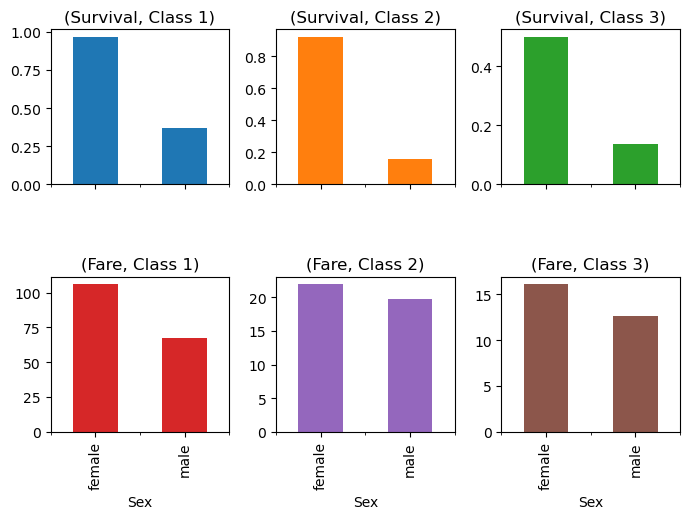

In [11]:
# a little column renaming
grouped_df.rename(columns = {'Survived': 'Survival'}, 
                  index = {1: 'Class 1', 2: 'Class 2', 3: 'Class 3'}, inplace = True)
grouped_df.index.set_names('Passenger class', level = 1, inplace = True)

# quick and dirty plot for sex/class disparity information
grouped_df[['Survival', 'Fare']].unstack().plot.bar(subplots=True, layout = (3,3), figsize = (7,7),
                                                         legend = False, sharex = True)
plt.tight_layout()
plt.show()

Essentially: 
- One groupby operation
- One pandas plot call

Result: informative visualization on sex/class disparity.

Groupbys clearly allow us to start reforming data/asking interesting questions!